BLS Industry Productivity 

In [2]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
labor_productivity = pd.read_csv("Data/labor-productivity.csv")
labor_productivity.head()

,Sector,NAICS,Industry,Digit,Basis,Measure,Units,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Mining,21,Mining,2-Digit,All workers,Labor productivity,% Change from previous year,N.A.,2.3,-0.6,...,0.4,8.9,5.3,17.6,18.6,3.5,3,6.2,18.2,1
1,Mining,21,Mining,2-Digit,All workers,Real sectoral output,% Change from previous year,N.A.,2.1,-0.6,...,8.3,8.5,12.5,3.8,-4.9,4,12,8.5,-7.2,0.6
2,Mining,21,Mining,2-Digit,All workers,Hours worked,% Change from previous year,N.A.,-0.2,0,...,7.9,-0.3,6.9,-11.7,-19.9,0.5,8.8,2.2,-21.5,-0.4
3,Mining,21,Mining,2-Digit,All workers,Output per worker,% Change from previous year,N.A.,2.6,2.4,...,0.9,7.1,8.2,14.2,17.1,3.5,3.6,8.2,13.9,6.6
4,Mining,21,Mining,2-Digit,All workers,Unit labor costs,% Change from previous year,N.A.,4.5,1.2,...,1.9,-5.3,-3.6,-13.5,-13.3,-3.8,-2.2,-3.6,-11.7,-10.6


In [4]:
labor_productivity.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15663 entries, 0 to 15662
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sector    15663 non-null  object
 1   NAICS     15663 non-null  object
 2   Industry  15663 non-null  object
 3   Digit     15663 non-null  object
 4   Basis     15663 non-null  object
 5   Measure   15663 non-null  object
 6   Units     15663 non-null  object
 7   1987      15663 non-null  object
 8   1988      15663 non-null  object
 9   1989      15663 non-null  object
 10  1990      15663 non-null  object
 11  1991      15663 non-null  object
 12  1992      15663 non-null  object
 13  1993      15663 non-null  object
 14  1994      15663 non-null  object
 15  1995      15663 non-null  object
 16  1996      15663 non-null  object
 17  1997      15663 non-null  object
 18  1998      15663 non-null  object
 19  1999      15663 non-null  object
 20  2000      15663 non-null  object
 21  2001      15

In [5]:
labor_changes_df = labor_productivity[['Sector', 'Industry', 'Measure', 'Units', '2007', '2008', '2009']]
labor_changes_df.head()

,Sector,Industry,Measure,Units,2007,2008,2009
0,Mining,Mining,Labor productivity,% Change from previous year,-7.9,-2.2,13.7
1,Mining,Mining,Real sectoral output,% Change from previous year,0.6,0.9,-0.2
2,Mining,Mining,Hours worked,% Change from previous year,9.1,3.1,-12.3
3,Mining,Mining,Output per worker,% Change from previous year,-7,-4.9,9.5
4,Mining,Mining,Unit labor costs,% Change from previous year,13.6,11.7,-11.3


In [6]:
labor_changes = labor_changes_df[(labor_changes_df['Measure'].isin(['Employment']))&(labor_changes_df['Units'].isin(['% Change from previous year', 'Thousands of jobs']))]
labor_changes

,Sector,Industry,Measure,Units,2007,2008,2009
9,Mining,Mining,Employment,% Change from previous year,8.1,6,-8.9
22,Mining,Mining,Employment,Thousands of jobs,684.8,726,661.5
32,Mining,Oil and gas extraction,Employment,% Change from previous year,7.7,8.8,0.4
45,Mining,Oil and gas extraction,Employment,Thousands of jobs,148.1,161.2,161.8
55,Mining,"Mining, except oil and gas",Employment,% Change from previous year,3,0.7,-7.8
...,...,...,...,...,...,...,...
15616,Other Services (except Public Administration),Funeral homes and funeral services,Employment,Thousands of jobs,105.4,108.3,103.4
15626,Other Services (except Public Administration),Coin-operated laundries and drycleaners,Employment,% Change from previous year,8.9,-4.7,-8.2
15639,Other Services (except Public Administration),Coin-operated laundries and drycleaners,Employment,Thousands of jobs,51.3,48.9,44.9
15649,Other Services (except Public Administration),Drycleaning and laundry services (except coin-...,Employment,% Change from previous year,0.1,-3.4,-9.2


In [7]:
labor_changes.isna().sum()

Sector      0
Industry    0
Measure     0
Units       0
2007        0
2008        0
2009        0
dtype: int64

In [8]:
labor_changes_2008 = labor_changes[['Sector', 'Industry', 'Measure', 'Units', '2008']]
labor_changes_2008['2008'] = labor_changes_2008['2008'].astype(float)
labor_changes_2008['2008'] = labor_changes_2008['2008'].astype(int)
print(labor_changes_2008.dtypes)

Sector      object
Industry    object
Measure     object
Units       object
2008         int64
dtype: object


<ipython-input-8-24969448f874>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labor_changes_2008['2008'] = labor_changes_2008['2008'].astype(float)
<ipython-input-8-24969448f874>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labor_changes_2008['2008'] = labor_changes_2008['2008'].astype(int)


In [9]:
labor_changes_3yrs = labor_changes.copy()
labor_changes_3yrs['2007'] = labor_changes_3yrs['2007'].astype(float)
labor_changes_3yrs['2008'] = labor_changes_3yrs['2008'].astype(float)                  
labor_changes_3yrs['2009'] = labor_changes_3yrs['2009'].astype(float)                   
labor_changes_3yrs['2007'] = labor_changes_3yrs['2007'].astype(int)
labor_changes_3yrs['2008'] = labor_changes_3yrs['2008'].astype(int)                  
labor_changes_3yrs['2009'] = labor_changes_3yrs['2009'].astype(int)                   
labor_changes_3yrs.head()

,Sector,Industry,Measure,Units,2007,2008,2009
9,Mining,Mining,Employment,% Change from previous year,8,6,-8
22,Mining,Mining,Employment,Thousands of jobs,684,726,661
32,Mining,Oil and gas extraction,Employment,% Change from previous year,7,8,0
45,Mining,Oil and gas extraction,Employment,Thousands of jobs,148,161,161
55,Mining,"Mining, except oil and gas",Employment,% Change from previous year,3,0,-7


In [74]:
changes_3yrs_df = labor_changes_3yrs[['Industry', 'Units', '2007', '2008', '2009']]
changes_3yrs_df.head()

,Industry,Units,2007,2008,2009
9,Mining,% Change from previous year,8,6,-8
22,Mining,Thousands of jobs,684,726,661
32,Oil and gas extraction,% Change from previous year,7,8,0
45,Oil and gas extraction,Thousands of jobs,148,161,161
55,"Mining, except oil and gas",% Change from previous year,3,0,-7


In [39]:
three_yrs_percent = labor_changes_3yrs[(labor_changes_3yrs['Units'].isin(['% Change from previous year']))]
three_yrs_job_nums = labor_changes_3yrs[(labor_changes_3yrs['Units'].isin(['Thousands of jobs']))]
#labor_changes_3yrs[((labor_changes_3yrs['Units'].isin(['% Change from previous year', 'Thousands of jobs']))]
three_yrs_percent_df = three_yrs_percent[['Industry', '2007', '2008', '2009']]
three_yrs_percent_df.head()


,Industry,2007,2008,2009
9,Mining,8,6,-8
32,Oil and gas extraction,7,8,0
55,"Mining, except oil and gas",3,0,-7
78,Support activities for mining,12,8,-14
101,Oil and gas extraction,7,8,0


In [102]:
Industry_only = labor_changes_3yrs['Industry']
Years = labor_changes_3yrs[['2007', '2008', '2009']]
swap_yrs = Years.swapaxes("index", "columns")
swap_yrs


,9,22,32,45,55,68,78,91,101,114,...,15557,15570,15580,15593,15603,15616,15626,15639,15649,15662
2007,8,684,7,148,3,227,12,308,7,148,...,-7,25,-9,26,-2,105,8,51,0,190
2008,6,726,8,161,0,229,8,335,8,161,...,-5,24,-6,24,2,108,-4,48,-3,183
2009,-8,661,0,161,-7,211,-14,287,0,161,...,-23,18,-10,22,-4,103,-8,44,-9,166


In [ ]:
three_yrs_percent_df = three_yrs_percent_df.pivot_table(
                        
    columns = ''
)

In [70]:
three_yrs_percent_df.stack()

9      Industry                                               Mining
       2007                                                        8
       2008                                                        6
       2009                                                       -8
32     Industry                               Oil and gas extraction
                                         ...                        
15626  2009                                                       -8
15649  Industry    Drycleaning and laundry services (except coin-...
       2007                                                        0
       2008                                                       -3
       2009                                                       -9
Length: 1908, dtype: object

In [73]:
three_yrs_percent_df = pd.DataFrame(index=[[three_yrs_percent_df['Industry'],[three_yrs_percent_df['2007', '2008', '2009']]]])

KeyError: ('2007', '2008', '2009')

In [66]:
changes_3yrs_df = pd.DataFrame(index=[[changes_3yrs_df.Industry], [changes_3yrs_df.Measure]],
                                    columns=['2007', '2008', '2009'])


TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [161]:
new_index = three_yrs_percent_df.set_index('Industry')
new_index.rename(columns = {'Industry':'Year'}, inplace = True)

In [164]:
new_index.rename(columns = {'Year':'Industry'}, inplace = True)

In [165]:
yrs_percent_swap = new_index.swapaxes("index", "columns")
#yrs_percent_swap.rename(columns= {"Industry": "Year"})
yrs_percent_swap.head()

Industry,Mining,Oil and gas extraction,"Mining, except oil and gas",Support activities for mining,Oil and gas extraction,Coal mining,Metal ore mining,Nonmetallic mineral mining and quarrying,Support activities for mining,Coal mining,...,"Hair, nail, and skin care services",Funeral homes and funeral services,Coin-operated laundries and drycleaners,Drycleaning and laundry services (except coin-operated),Linen and uniform supply,Photofinishing,Reupholstery and furniture repair,Funeral homes and funeral services,Coin-operated laundries and drycleaners,Drycleaning and laundry services (except coin-operated)
2007,8,7,3,12,7,-1,12,3,12,-1,...,0,-2,8,0,3,-7,-9,-2,8,0
2008,6,8,0,8,8,6,10,-6,8,6,...,-1,2,-4,-3,1,-5,-6,2,-4,-3
2009,-8,0,-7,-14,0,0,-13,-11,-14,0,...,3,-4,-8,-9,-6,-23,-10,-4,-8,-9


<AxesSubplot:>

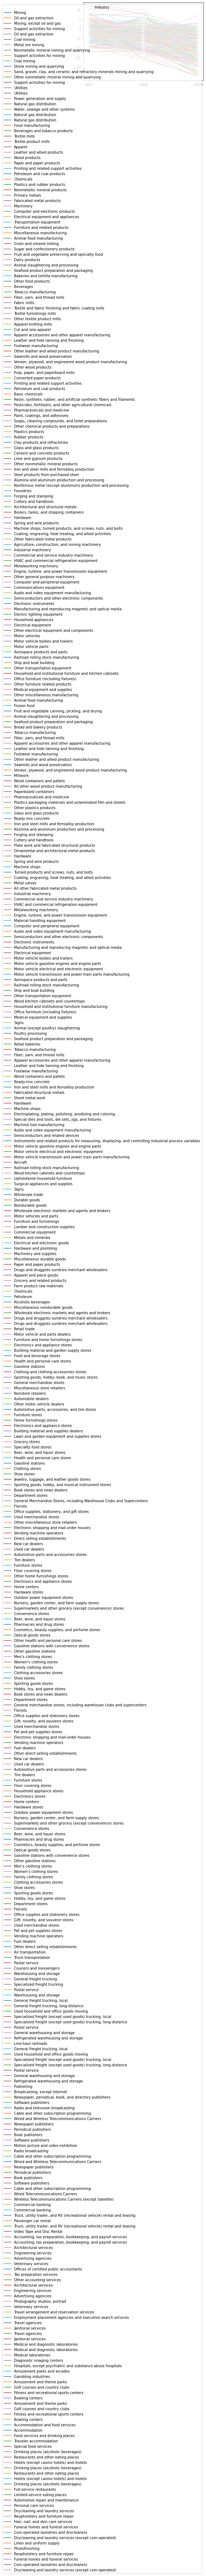

In [167]:
yrs_percent_swap.plot()

In [56]:
three_yrs_percent_df.stack()

9      Industry                                               Mining
       2007                                                        8
       2008                                                        6
       2009                                                       -8
32     Industry                               Oil and gas extraction
                                         ...                        
15626  2009                                                       -8
15649  Industry    Drycleaning and laundry services (except coin-...
       2007                                                        0
       2008                                                       -3
       2009                                                       -9
Length: 1908, dtype: object

In [ ]:
years = pd.Series()

In [33]:
#percent_df = pd.DataFrame(three_yrs_percent(columns = ['Industry', '2007','2008','2009']))
pivot_percent = three_yrs_percent.pivot(columns = 'Industry')
pivot_percent.head

<bound method NDFrame.head of                 Sector                                  \
Industry Accommodation Accommodation and food services   
9                  NaN                             NaN   
32                 NaN                             NaN   
55                 NaN                             NaN   
78                 NaN                             NaN   
101                NaN                             NaN   
...                ...                             ...   
15557              NaN                             NaN   
15580              NaN                             NaN   
15603              NaN                             NaN   
15626              NaN                             NaN   
15649              NaN                             NaN   

                                                                         \
Industry Accounting, tax preparation, bookkeeping, and payroll services   
9                                                       NaN      

In [29]:
sns.lineplot(data=three_yrs_percent, x=three_yrs_percent['Industry'], y=three_yrs_percent['2007','2008','2009'] )

KeyError: ('2007', '2008', '2009')

In [22]:
# Make the initial plot
plot( 2007:2009, three_yrs_percent[1,3:ncol(three_yrs_percent)], type="l", col=1)

# Here is the loop where the rest is added
for (i in 2:nrow(three_yrs_percent)) { lines(2007:2009, three_yrs_percent[i,3:ncol(traff)], type="l", col=i)}

SyntaxError: invalid syntax (<ipython-input-22-0281066549d6>, line 2)

<AxesSubplot:>

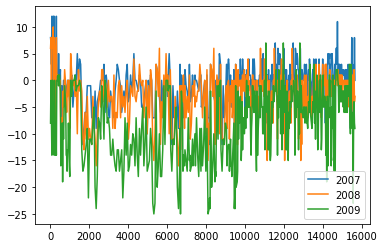

In [23]:
three_yrs_percent.plot()

axes = labor_changes_3yrs['Sector'.plot.line(
    subplots=True, color={"pig": "pink", "horse": "#742802"}
)

In [15]:
labor_changes_2008.Sector.value_counts()

Manufacturing                                                               398
Retail Trade                                                                232
Transportation and Warehousing                                               50
Wholesale Trade                                                              50
Information                                                                  44
Other Services (except Public Administration)                                28
Accommodation and Food Services                                              28
Professional, Scientific, and Technical Services                             28
Mining                                                                       28
Arts, Entertainment, and Recreation                                          20
Utilities                                                                    14
Administrative and Support and Waste Management and Remediation Services     12
Health Care and Social Assistance       

In [16]:
labor_changes_2008.Industry.value_counts()

Postal service                                                                  8
Florists                                                                        6
Cable and other subscription programming                                        6
Furniture stores                                                                6
Vending machine operators                                                       6
                                                                               ..
Plastics and rubber products                                                    2
Grocery stores                                                                  2
Sand, gravel, clay, and ceramic and refractory minerals mining and quarrying    2
Basic chemicals                                                                 2
Wired Telecommunications Carriers                                               2
Name: Industry, Length: 320, dtype: int64

In [ ]:
labor_changes_2008.nunique()


In [ ]:
Industries_employment_percent = labor_changes_2008[['Sector', 'Industry', 'Measure', 'Units', '2008']]
ind_empl_percent = Industries_employment_percent[(Industries_employment_percent['Measure'].isin(['Employment']))& (Industries_employment_percent['Units'].isin(['% Change from previous year']))]
#ind_empl_percent.head()
print(ind_empl_percent.dtypes)

In [ ]:
emp_percent_sorted = ind_empl_percent.groupby('Sector')['2008'].sum().sort_values(ascending=True)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import ScalarFormatter;

In [ ]:
emp_percent_sorted.plot(kind='barh');

In [ ]:
#top_5_genres_profit = new_df.groupby('genre_ids')['profit'].sum().sort_values(ascending=False).nlargest(5)
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import ScalarFormatter
fig, ax = plt.subplots(figsize=(25,25))
emp_percent_sorted.plot(kind='barh', figsize=(10,8), color="teal")
plt.title('Employment Changes 2008', fontsize=16)
plt.xlabel('Percent Change From Previous Year', fontsize=14)
plt.ylabel('Sector', fontsize=14)

from matplotlib.ticker import FuncFormatter

.xaxis.set_major_formatter.FuncFormatter(lambda x, pos: f'{x * 1e2:f}')

In [ ]:
Industries_employment_num_jobs = labor_changes_c[['Sector', 'Industry', 'Measure', 'Units', '2008']]
ind_empl_num_jobs = Industries_employment_percent[(Industries_employment_percent['Measure'].isin(['Employment']))& (Industries_employment_percent['Units'].isin(['Thousands of jobs']))]
ind_empl_num_jobs.head()

In [ ]:
num_jobs_sorted = ind_empl_num_jobs.groupby('Sector')['2008'].sum().sort_values(ascending=True)

In [ ]:
num_jobs_sorted.plot(kind='barh');